In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np


train_data_dir =r"C:\Users\demir\Desktop\4.sınıf\derin öğrenmeye giriş\ÖDEV\ödev için dataset\BDMediLeaves A leaf images dataset for Bangladeshi medicinal plants identification\BDMediLeaves Dataset - Augmented\test,train,val\Train"
test_data_dir = r"C:\Users\demir\Desktop\4.sınıf\derin öğrenmeye giriş\ÖDEV\ödev için dataset\BDMediLeaves A leaf images dataset for Bangladeshi medicinal plants identification\BDMediLeaves Dataset - Augmented\test,train,val\Test"
val_data_dir = r"C:\Users\demir\Desktop\4.sınıf\derin öğrenmeye giriş\ÖDEV\ödev için dataset\BDMediLeaves A leaf images dataset for Bangladeshi medicinal plants identification\BDMediLeaves Dataset - Augmented\test,train,val\Validation"

datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)



train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
)

validation_generator = datagen.flow_from_directory(
    val_data_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
)

test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(299, 299),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=False
)


Found 28949 images belonging to 10 classes.
Found 5797 images belonging to 10 classes.
Found 3860 images belonging to 10 classes.


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np



base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)  


model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


epochs = 7
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)


87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/7
905/905 [==============================] - 1138s 1s/step - loss: 0.1821 - accuracy: 0.9446 - val_loss: 3.7376 - val_accuracy: 0.4744
Epoch 2/7
905/905 [==============================] - 1016s 1s/step - loss: 0.0576 - accuracy: 0.9821 - val_loss: 0.5298 - val_accuracy: 0.8484
Epoch 3/7
905/905 [==============================] - 1019s 1s/step - loss: 0.0469 - accuracy: 0.9853 - val_loss: 0.0873 - val_accuracy: 0.9721
Epoch 4/7
905/905 [==============================] - 1021s 1s/step - loss: 0.0368 - accuracy: 0.9882 - val_loss: 0.9537 - val_accuracy: 0.7885
Epoch 5/7
905/905 [==============================] - 1018s 1s/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0811 - val_accuracy: 0.9760
Epoch 6/7
905/905 [==============================] - 1019s 1s/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.1833 - val_accuracy: 0.9517
Epoch 7/7
905/905 [==============================] - 1012s 1s/step - loss: 0.

In [6]:
model.save('/content/drive/MyDrive/Colab Notebooks/augmentedwithinterception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
from tensorflow.keras.models import load_model

model_path = r"C:\Users\demir\Desktop\MODELLER VE KODLAR\AUGMENTED VERİ SETİ\inception\augmentedwithinterception.h5"
loaded_model = load_model(model_path)


In [11]:
epoch_data = {
    'epoch': [1, 2, 3, 4, 5, 6, 7],
    'steps': [905, 905, 905, 905, 905, 905, 905],
    'duration': [1138, 1016, 1019, 1021, 1018, 1019, 1012],
    'train_loss': [0.1821, 0.0576, 0.0469, 0.0368, 0.0314, 0.0259, 0.0256],
    'train_accuracy': [0.9446, 0.9821, 0.9853, 0.9882, 0.9901, 0.9918, 0.9922],
    'val_loss': [3.7376, 0.5298, 0.0873, 0.9537, 0.0811, 0.1833, 0.0476],
    'val_accuracy': [0.4744, 0.8484, 0.9721, 0.7885, 0.9760, 0.9517, 0.9850]
}


import pandas as pd
df = pd.DataFrame(epoch_data)


print(df)

   epoch  steps  duration  train_loss  train_accuracy  val_loss  val_accuracy
0      1    905      1138      0.1821          0.9446    3.7376        0.4744
1      2    905      1016      0.0576          0.9821    0.5298        0.8484
2      3    905      1019      0.0469          0.9853    0.0873        0.9721
3      4    905      1021      0.0368          0.9882    0.9537        0.7885
4      5    905      1018      0.0314          0.9901    0.0811        0.9760
5      6    905      1019      0.0259          0.9918    0.1833        0.9517
6      7    905      1012      0.0256          0.9922    0.0476        0.9850


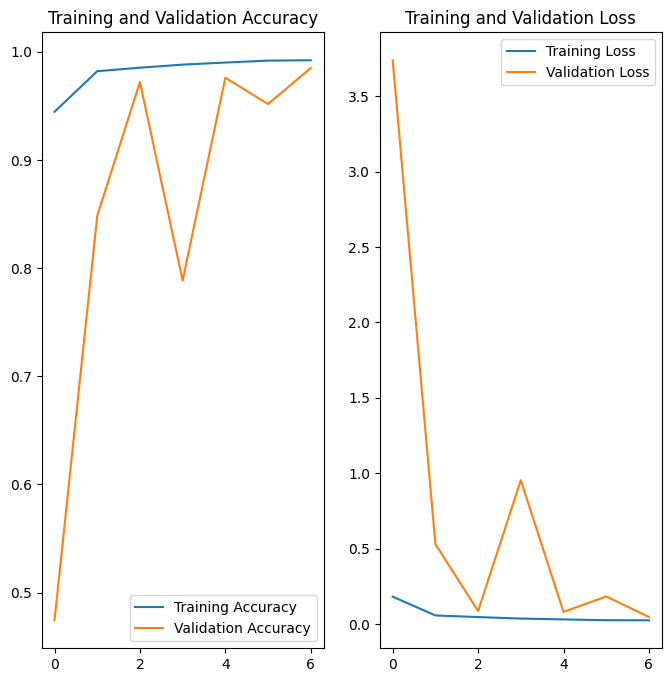

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from keras.utils import to_categorical


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


test_loss, test_acc = loaded_model.evaluate(test_generator)
print('Test accuracy:', test_acc)


y_pred = loaded_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

121/121 [==============================] - 192s 2s/step - loss: 0.1086 - accuracy: 0.9671
Test accuracy: 0.9670984745025635
121/121 [==============================] - 178s 1s/step


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       396
           1       0.99      0.92      0.95       379
           2       0.92      0.99      0.95       388
           3       0.93      0.98      0.95       386
           4       0.85      0.98      0.91       386
           5       1.00      0.92      0.96       384
           6       0.99      0.94      0.96       392
           7       0.98      0.79      0.87       379
           8       0.94      0.97      0.96       386
           9       0.98      0.92      0.95       384

    accuracy                           0.94      3860
   macro avg       0.95      0.94      0.94      3860
weighted avg       0.94      0.94      0.94      3860

Overall Precision: 0.95
Overall Recall: 0.94
Overall F1-score: 0.94


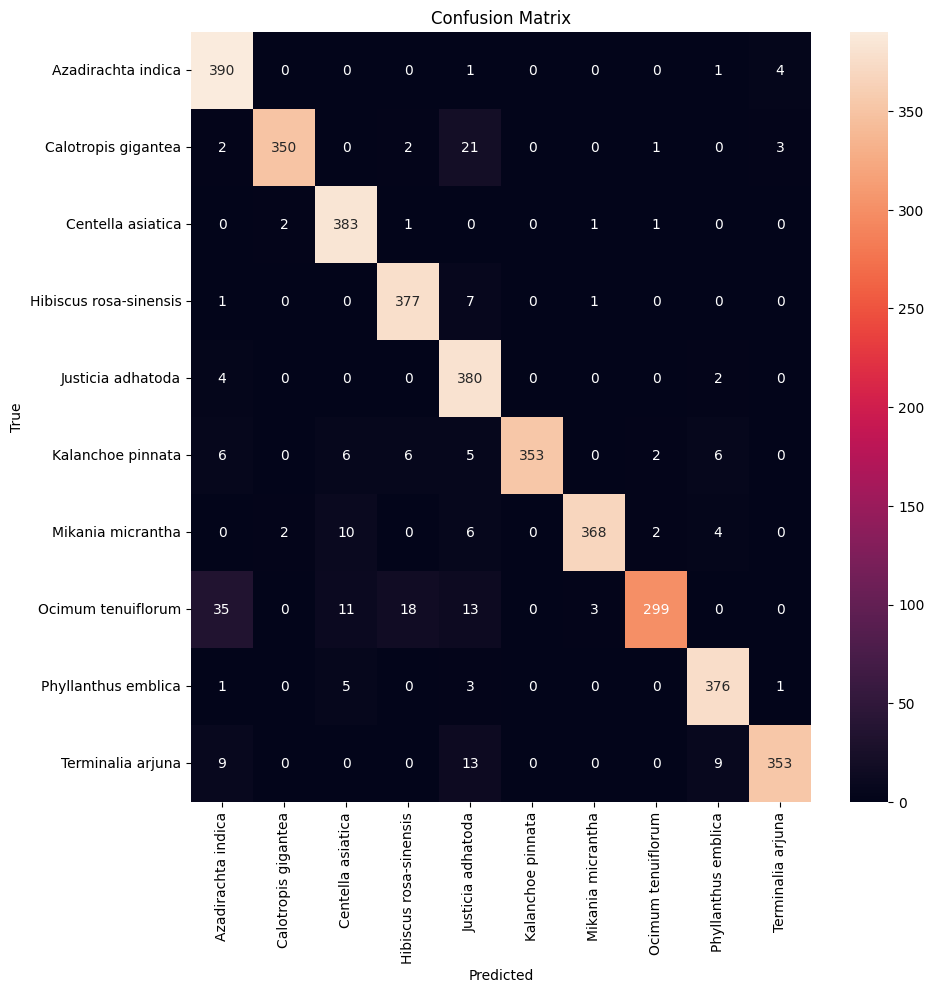

In [ ]:

print('Classification Report:')
print(classification_report(y_true, y_pred_classes))


print(f'Overall Precision: {precision:.2f}')
print(f'Overall Recall: {recall:.2f}')
print(f'Overall F1-score: {f1:.2f}')


cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()